In [15]:
%matplotlib inline
from IPython import display
import os
import io
import itertools
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib

import rtmtools.lblrtm.aerutils as aerutils
import rtmtools.lblrtm.aeranalyse as aeranalyse
import rtmtools.lblrtm.visualisation as viz

import rtmtools.clirad.sw.wrangle as cliradwrangle
import rtmtools.clirad.sw.analyse as cliradanalyse
import rtmtools.clirad.lw.info

import rtmtools.rrtmg.lw.wrangle as rrtmgwrangle
import rtmtools.rrtmg.sw.analyse as rrtmganalyse



importlib.reload(aerutils)
importlib.reload(aeranalyse)
importlib.reload(viz)

importlib.reload(cliradwrangle)
importlib.reload(cliradanalyse)
importlib.reload(rtmtools.clirad.lw.info)

importlib.reload(rrtmgwrangle)
importlib.reload(rrtmganalyse)

<module 'rtmtools.rrtmg.sw.analyse' from '/nuwa_cluster/home/jackyu/radiation/rtmtools/rtmtools/rrtmg/sw/analyse.py'>

In [16]:
name_molecule = r'$O_{3}$'

#### Load CRD results

In [3]:
# Get lbl line-by-line results
pathout_crd = '/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H2008_O3_cut25/OUTPUT_RADSUM'
pnl_crd = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom = pathout_crd, cooling_rate = True, signed_fluxes = True)


In [13]:
# H1996 cutoff = 10 cm-1
pathout_crd1 = '/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H1996_H2O_cut10/OUTPUT_RADSUM'
pnl_crd1 = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom = pathout_crd1, cooling_rate = True, signed_fluxes = True)


#### Load CLIRAD results

In [21]:
# Read OUTPUT_CLIRAD.dat
pathout_clirad = '/nuwa_cluster/home/jackyu/radiation/clirad/LW/examples/mls75_O3_H2012/OUTPUT_CLIRAD.dat'
pnl_clirad = cliradwrangle.OUTPUT_CLIRAD_to_PandasPanel(readfrom = pathout_clirad, cooling_rate = True, signed_fluxes= True)


In [5]:
# prepare results Hitran 2012 updated version
def path_cliradlw_h2012():
    return '../clirad/LW/examples/mls75_O3_H2012/CLIRAD_IR_output.dat'


def get_rateT(df, ratename = 'cooling rates'):
    return pd.DataFrame({'pressure': .5 * (df['p'].values[1:] + df['p'].values[: -1]),
                    ratename: df[ratename].values[1:]})


df = cliradwrangle.output_txtfile_to_DataFrame(path_cliradlw_h2012())

rateT_clirad2012 = get_rateT(df, ratename = 'cooling rates')

#### Load LBLRTM results

In [6]:
# Get AER line-by-line results
pathout_lblrtm = '/nuwa_cluster/home/jackyu/line_by_line/aerlbl_v12.2_package/runs/LW/run_mls75pro_O3/OUTPUT_RADSUM'
pnl_lblrtm = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom = pathout_lblrtm, signed_fluxes = True, cooling_rate = True)


#### Load RRTMG results

In [7]:
pathout_rrtmg = '/nuwa_cluster/home/jackyu/radiation/rrtmg/LW/examples/mls70_O3/OUTPUT_RRTM'
pnl_rrtmg = rrtmgwrangle.OUTPUT_RRTM_to_pandasPanel(readfrom = pathout_rrtmg, signed_fluxes = True, cooling_rate = True)


# Total cooling rates

In [20]:
def plot_total_cooling_rates(infos_wavenumber = None, infos_spectralband = None):
    global molecule_name, xlim_linear
    
    atm_levels = [70, 30, 0]
    
    names_wavenumber, colours_wavenumber, linestyles_wavenumber, pnls_wavenumber = \
    map(list, zip(*infos_wavenumber))
    
    dfs_wavenumber = [aeranalyse.sum_OUTPUT_RADSUM_over_wbands(pnl, V1 = 0, V2 = 3000) \
                      for pnl in pnls_wavenumber]
    
    names_spectralband, colours_spectralband, linestyles_spectralband, pnls_spectralband = \
    map(list, zip(*infos_spectralband))
    
    dfs_spectralband = [cliradanalyse.sum_OUTPUT_CLIRAD_over_wbands(pnl, wbands = range(1, 11))\
                       for pnl in pnls_spectralband]
    
    dfs = dfs_wavenumber + dfs_spectralband
    names = names_wavenumber + names_spectralband
    colours = colours_wavenumber + colours_spectralband
    linestyles = linestyles_wavenumber + linestyles_spectralband
    
    dfs_atm_levels = [df.loc[atm_levels, :] for df in dfs]
    
    viz.tabulate_difference(dfs = dfs_atm_levels, 
                            names = names,
                            title = 'Total cooling rate. {}'.format(name_molecule))    
  
    max_cr = max([df['cooling_rate'].max() for df in dfs])

    viz.plot_pres_vs_hrcr(dfs = dfs,
                          names = names,
                          linestyles = linestyles, 
                          colours = colours,
                          title = 'Total cooling rate. {}'.format(name_molecule),
                              cooling_rate = True,
                         xlim_linear = xlim_linear,
                         xlim_log = (- .1, 20) if max_cr >= 20 else None)
    
    display.display(plt.gcf()); plt.close()
    


Total cooling rate. $O_{3}$

CRD
       pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -415.383897   0.000000 -415.383897      0.000000
30   299.800000 -421.720705   2.063563 -419.657142     -0.059957
0   1013.000000 -423.662018   4.378191 -419.283827      0.026399

LBLRTM
     pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.0024 -412.208759   0.000000 -412.208759      0.000000
30   299.8000 -421.352791   3.336097 -418.016694     -0.065692
0   1013.0000 -423.532488   5.966166 -417.566322      0.000920

RRTMG
      pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -412.7006     0.0000 -412.7006       0.00000
30   299.70000 -421.4352     3.0272 -418.4080      -0.06896
0   1013.00000 -423.5988     5.7209 -417.8779       0.03329

CLIRAD
       pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -414.459654   0.000012 -414.459642     -0.139192
30   299.800000 -421.725494   2.313927 -419.411567     -0.058

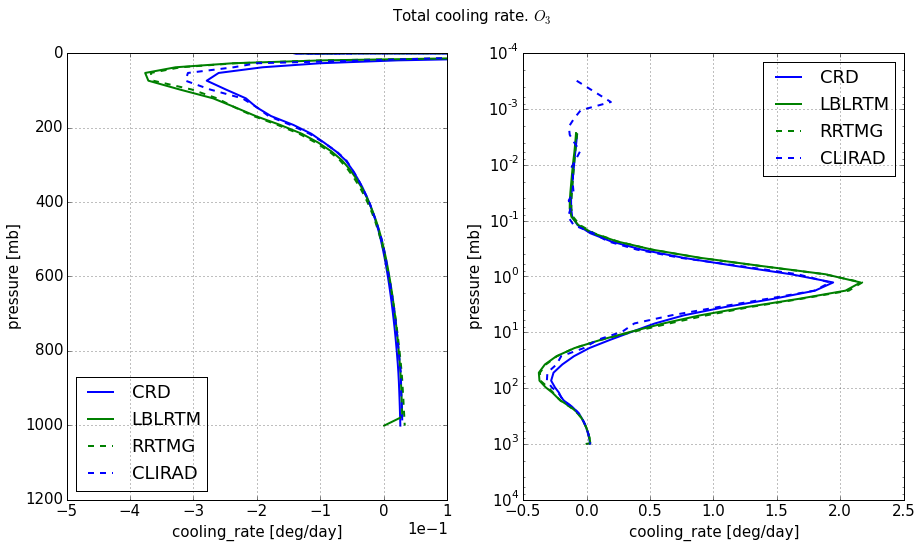

In [21]:
xlim_linear = (- .5, .1)
plot_total_cooling_rates(infos_wavenumber = [('CRD', 'b', '-', pnl_crd),\
                                            ('LBLRTM', 'g', '-', pnl_lblrtm),\
                                            ('RRTMG', 'g', '--', pnl_rrtmg)],
                        infos_spectralband = [('CLIRAD', 'b', '--', pnl_clirad)])

In [31]:
xlim_linear = (- .5, .05)

# In RRTMG's wavenumber bands

In [22]:

def fluxtableNhrplot_by_rrtmg_bands(pnl_rrtmg, *infos_lbl):
    global name_molecule, xlim_linear
    
    atm_levels = [70, 30, 0]
    
    names, colours, linestyles, pnls_lbl = map(list, zip(*infos_lbl))
        
    lbl_pnls_by_rrtmg_bands = [aeranalyse.lines2bands(pnl_lbl, wbands = pnl_rrtmg.items.values)\
                              for pnl_lbl in pnls_lbl]

    names.append('RRTMG')
    colours.append('g')
    linestyles.append('--')
    pnls = [pnl_rrtmg] + lbl_pnls_by_rrtmg_bands
    
    
    for item in pnl_rrtmg.items:
        print('---------------------------------------------------------------------------')
        print() 
        dfs = [pnl[item].loc[atm_levels, :] for pnl in pnls]
        
        viz.tabulate_difference(dfs = dfs, 
                                names = names,
                                title = 'RRTMG Wavenumber band: {} ~ {} cm-1'.format(*item))      
        
        dfs = [pnl[item] for pnl in pnls]
        
        max_cr = max([df['cooling_rate'].max() for df in dfs])
        
        viz.plot_pres_vs_hrcr(dfs = dfs,
                              names = names,
                              linestyles = linestyles, 
                              colours = colours,
                              title = 'Cooling rate {} {} ~ {} cm-1'.format(name_molecule, *item),
                              cooling_rate = True,
                             xlim_linear = xlim_linear,
                             xlim_log = (-.5, 20) if max_cr >= 20 else None)
    
        display.display(plt.gcf()); plt.close()
    


Flux tables and cooling rates in RRTMG spectral bands


---------------------------------------------------------------------------


RRTMG Wavenumber band: 10.0 ~ 350.0 cm-1

CRD
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -54.5825          0  -54.5825            -0
30   299.70000 -54.5825          0  -54.5825            -0
0   1013.00000 -54.5825          0  -54.5825            -0

LBLRTM
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -54.573788  0.000000e+00 -54.573788  0.000000e+00
30   299.800000 -54.573788  2.819921e-07 -54.573787  1.311528e-09
0   1013.000000 -54.573788  5.670697e-07 -54.573787  3.837701e-09

RRTMG
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -54.630229   0.000000 -54.630229      0.000000
30   299.8000 -54.660391   0.080099 -54.580292      0.000198
0   1013.0000 -54.581667   0.095058 -54.486609      0.028816

CRD - LBLRTM
    pressure   flux_up     flux_down  net_flux 

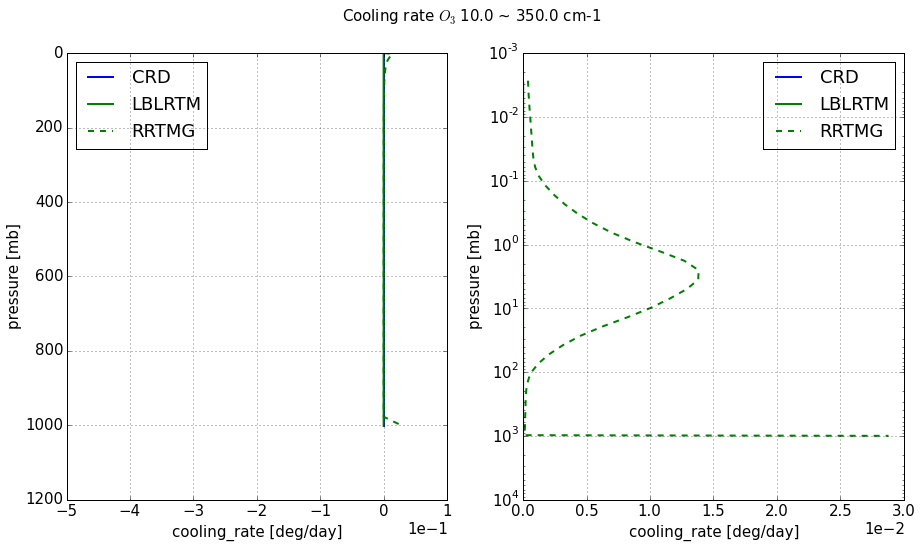

---------------------------------------------------------------------------


RRTMG Wavenumber band: 350.0 ~ 500.0 cm-1

CRD
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -60.9174          0  -60.9174            -0
30   299.70000 -60.9174          0  -60.9174            -0
0   1013.00000 -60.9174          0  -60.9174            -0

LBLRTM
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -60.916637  0.000000e+00 -60.916637  0.000000e+00
30   299.800000 -60.916638  2.644419e-07 -60.916637  5.833640e-10
0   1013.000000 -60.916638  5.671926e-07 -60.916637  4.275775e-09

RRTMG
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -60.928586   0.000000 -60.928586  0.000000e+00
30   299.8000 -60.928885   0.000391 -60.928495  5.338283e-07
0   1013.0000 -60.917465   0.000504 -60.916961  4.063699e-03

CRD - LBLRTM
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003 -0.000763  0.000000e+00 -0.0

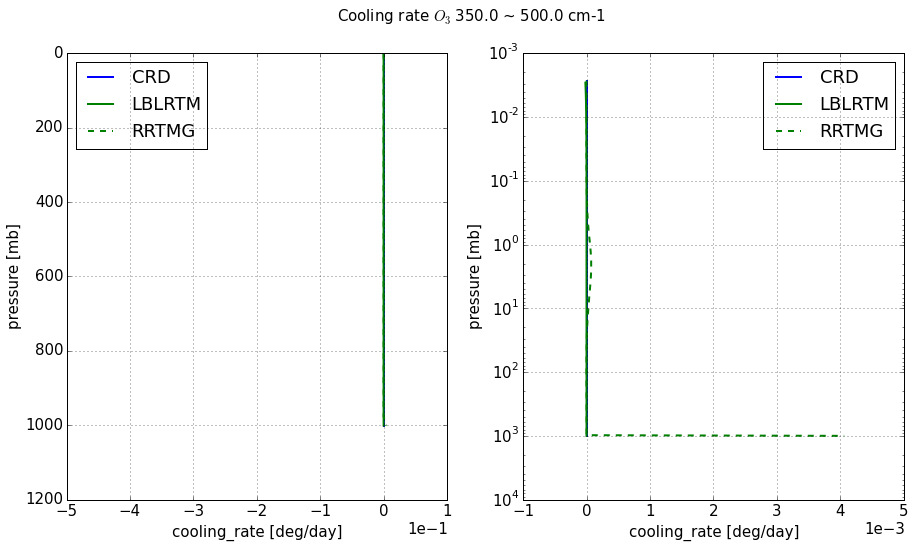

---------------------------------------------------------------------------


RRTMG Wavenumber band: 500.0 ~ 630.0 cm-1

CRD
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -58.6466          0  -58.6466            -0
30   299.70000 -58.6466          0  -58.6466            -0
0   1013.00000 -58.6466          0  -58.6466            -0

LBLRTM
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -58.652387  0.000000e+00 -58.652387  0.000000e+00
30   299.800000 -58.652387  2.203418e-07 -58.652386 -5.988993e-11
0   1013.000000 -58.652387  5.000336e-07 -58.652386  4.110279e-09

RRTMG
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -58.607044   0.000000 -58.607044      0.000000
30   299.8000 -58.634682   0.019092 -58.615591     -0.000013
0   1013.0000 -58.646623   0.024863 -58.621760     -0.003475

CRD - LBLRTM
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.005787  0.000000e+00  0.0

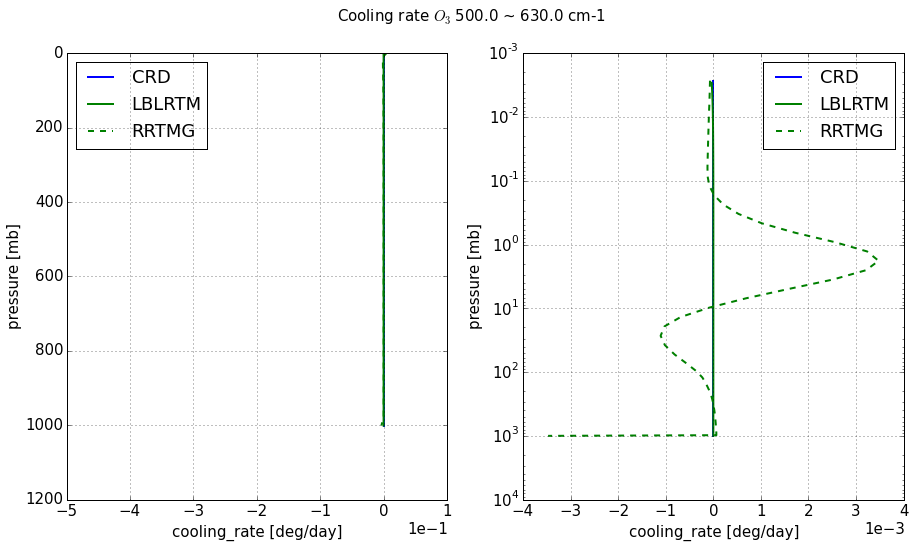

---------------------------------------------------------------------------


RRTMG Wavenumber band: 630.0 ~ 700.0 cm-1

CRD
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -30.3159     0.0000  -30.3159            -0
30   299.70000 -30.8956     0.3455  -30.5501            -0
0   1013.00000 -30.8956     0.3455  -30.5501            -0

LBLRTM
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -30.901144  0.000000e+00 -30.901144  0.000000e+00
30   299.800000 -30.901144  1.041794e-07 -30.901144 -2.530970e-10
0   1013.000000 -30.901144  2.470559e-07 -30.901144  2.162866e-09

RRTMG
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -29.977814   0.000000 -29.977814      0.000000
30   299.8000 -30.832188   0.488407 -30.343781     -0.000893
0   1013.0000 -30.895458   0.605721 -30.289736     -0.002771

CRD - LBLRTM
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.585244     0.0000  0.585244 

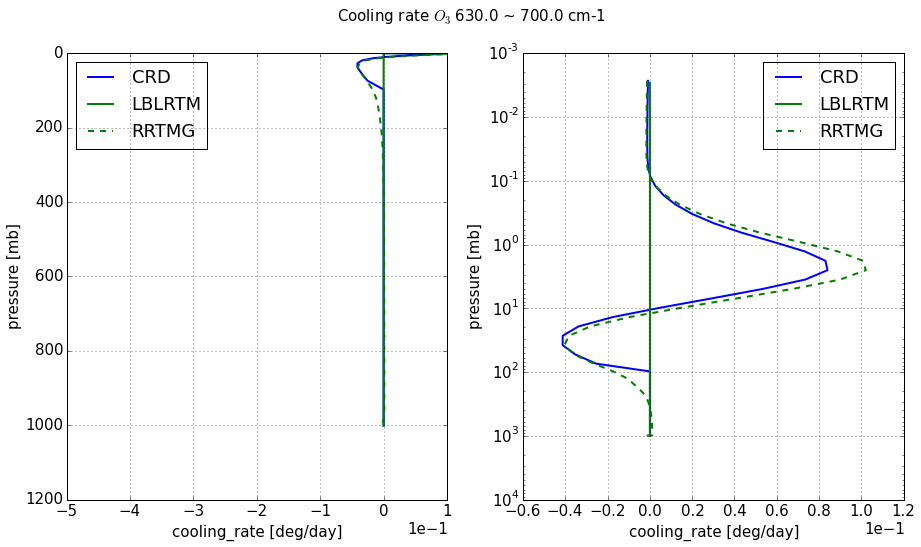

---------------------------------------------------------------------------


RRTMG Wavenumber band: 700.0 ~ 820.0 cm-1

CRD
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -47.6750     0.0000  -47.6750      -0.00000
30   299.70000 -48.8203     0.5217  -48.2986      -0.00133
0   1013.00000 -48.8871     0.6604  -48.2267       0.00135

LBLRTM
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -48.899846  0.000000e+00 -48.899846  0.000000e+00
30   299.800000 -48.899846  1.488874e-07 -48.899845 -7.042967e-10
0   1013.000000 -48.899846  3.684535e-07 -48.899845  3.418567e-09

RRTMG
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -47.703364   0.000000 -47.703364      0.000000
30   299.8000 -48.795771   0.549176 -48.246595     -0.001471
0   1013.0000 -48.886744   0.695462 -48.191282     -0.005819

CRD - LBLRTM
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  1.224846     0.0000  1.224846 

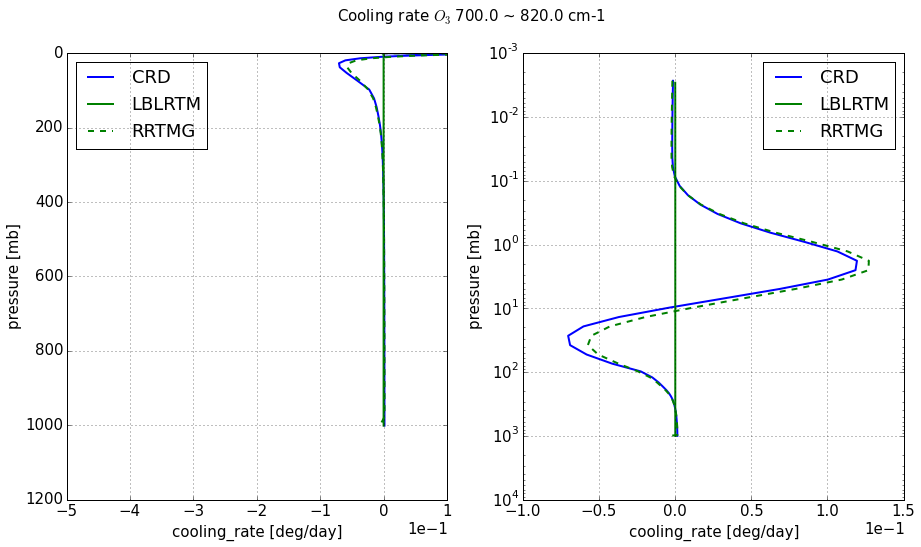

---------------------------------------------------------------------------


RRTMG Wavenumber band: 820.0 ~ 980.0 cm-1

CRD
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -53.9607          0  -53.9607            -0
30   299.70000 -53.9607          0  -53.9607            -0
0   1013.00000 -53.9607          0  -53.9607            -0

LBLRTM
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -53.981633  0.000000e+00 -53.981633  0.000000e+00
30   299.800000 -53.981634  1.416120e-07 -53.981634 -1.219487e-09
0   1013.000000 -53.981634  3.738202e-07 -53.981634  3.767053e-09

RRTMG
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -53.906150   0.000000 -53.906150      0.000000
30   299.8000 -53.933699   0.011429 -53.922270     -0.000057
0   1013.0000 -53.960338   0.020409 -53.939929     -0.007977

CRD - LBLRTM
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.020933  0.000000e+00  0.0

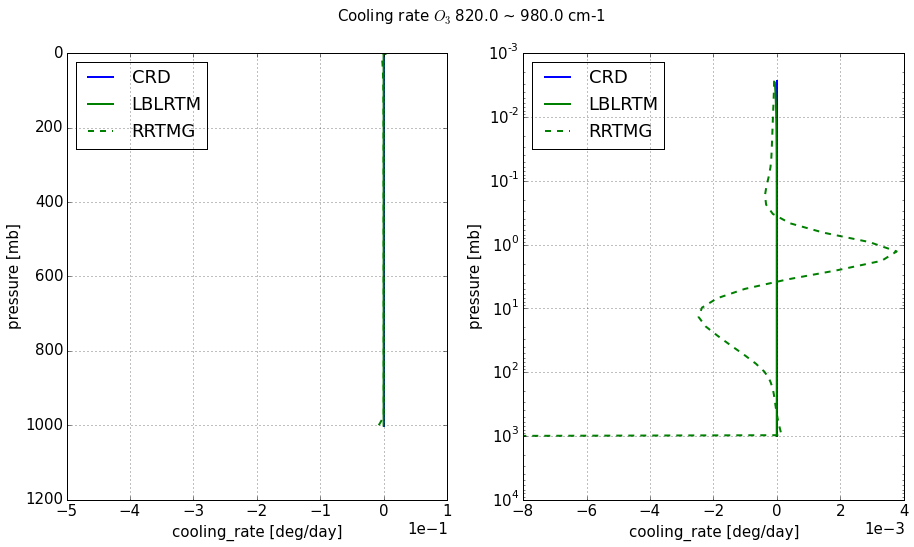

---------------------------------------------------------------------------


RRTMG Wavenumber band: 980.0 ~ 1080.0 cm-1

CRD
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -18.3205     0.0000  -18.3205      -0.00000
30   299.70000 -24.6755     2.0180  -22.6575      -0.06534
0   1013.00000 -26.6401     4.4076  -22.2325       0.02820

LBLRTM
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -18.542117   0.000000 -18.542117      0.000000
30   299.800000 -24.723457   2.022201 -22.701256     -0.059611
0   1013.000000 -26.654056   4.321516 -22.332540      0.026223

RRTMG
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -18.354242   0.000000 -18.354242      0.000000
30   299.8000 -24.720024   2.035311 -22.684713     -0.061416
0   1013.0000 -26.640246   4.302499 -22.337746      0.022199

CRD - LBLRTM
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.221617   0.000000  0.221617     -0.0000

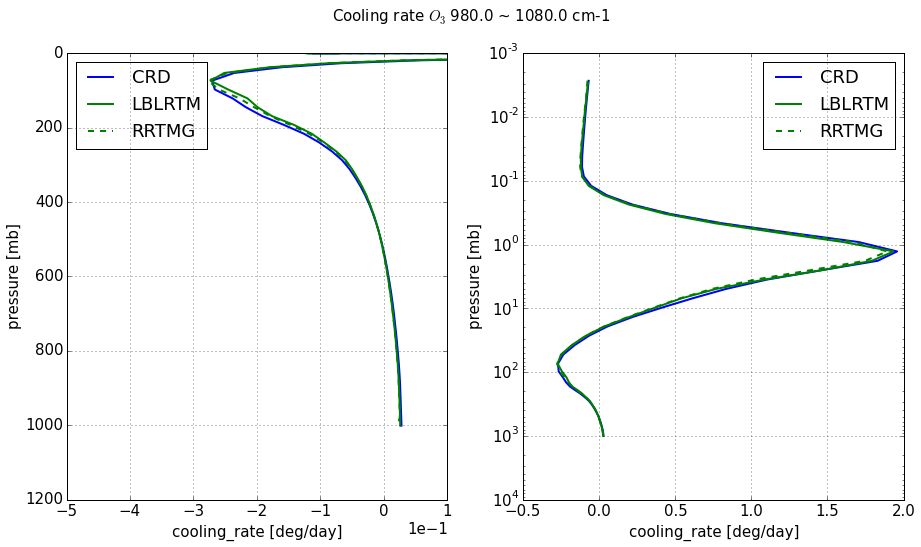

---------------------------------------------------------------------------


RRTMG Wavenumber band: 1080.0 ~ 1180.0 cm-1

CRD
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -20.9504     0.0000  -20.9504      -0.00000
30   299.70000 -21.4862     0.1338  -21.3524      -0.00119
0   1013.00000 -21.5225     0.1850  -21.3375       0.00059

LBLRTM
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -21.369760   0.000000 -21.369760      0.000000
30   299.800000 -21.525225   0.041361 -21.483864     -0.000346
0   1013.000000 -21.535940   0.056672 -21.479268      0.000176

RRTMG
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -20.917206   0.000000 -20.917206      0.000000
30   299.8000 -21.474850   0.137019 -21.337830     -0.001305
0   1013.0000 -21.522739   0.191802 -21.330937     -0.002425

CRD - LBLRTM
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.419360   0.000000  0.419360     -0.000

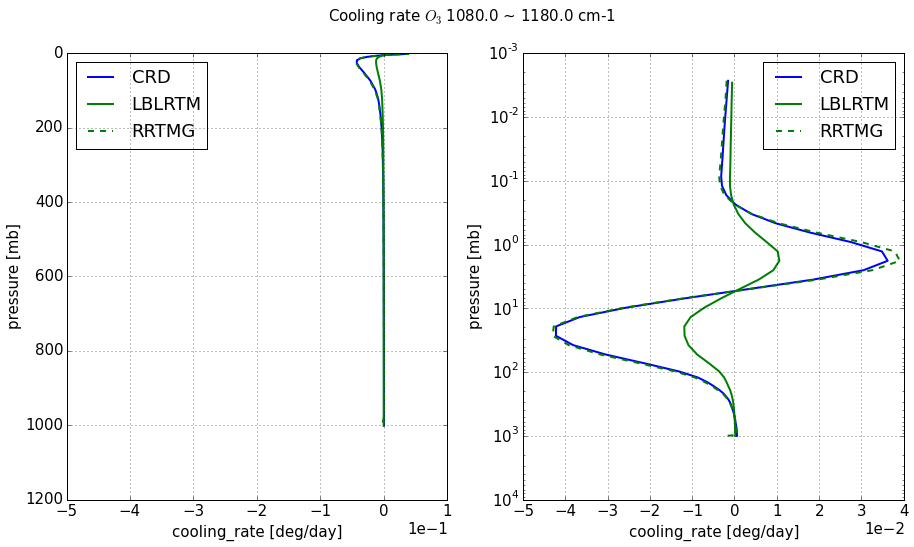

---------------------------------------------------------------------------


RRTMG Wavenumber band: 1180.0 ~ 1390.0 cm-1

CRD
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -31.2994          0  -31.2994            -0
30   299.70000 -31.2994          0  -31.2994            -0
0   1013.00000 -31.2994          0  -31.2994            -0

LBLRTM
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -31.323236  0.000000e+00 -31.323236  0.000000e+00
30   299.800000 -31.323236  5.537980e-08 -31.323236 -1.247450e-09
0   1013.000000 -31.323236  1.756035e-07 -31.323236  2.174742e-09

RRTMG
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -31.267505   0.000000 -31.267505      0.000000
30   299.8000 -31.285929   0.004517 -31.281412     -0.000042
0   1013.0000 -31.299603   0.006876 -31.292726     -0.004272

CRD - LBLRTM
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.023836  0.000000e+00  0

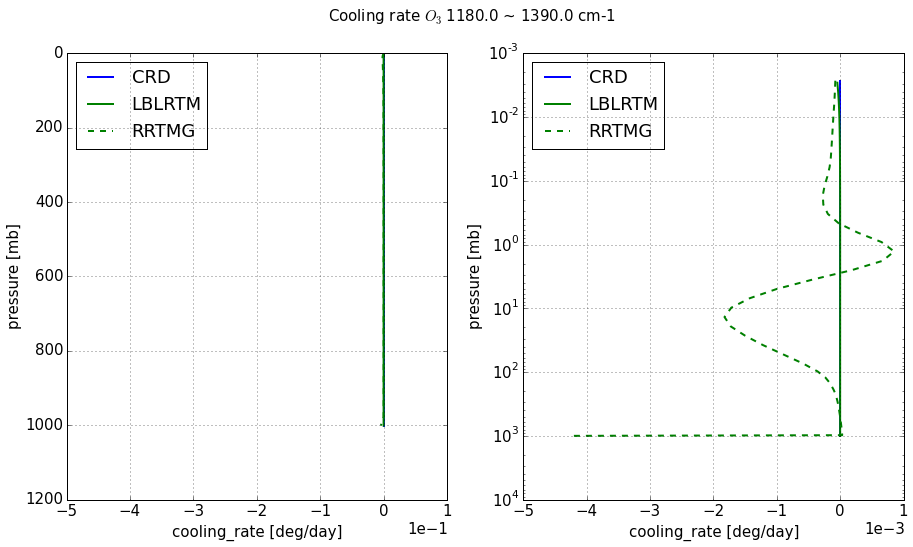

---------------------------------------------------------------------------


RRTMG Wavenumber band: 1390.0 ~ 1480.0 cm-1

CRD
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -8.8986          0   -8.8986            -0
30   299.70000  -8.8986          0   -8.8986            -0
0   1013.00000  -8.8986          0   -8.8986            -0

LBLRTM
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -8.906562  0.000000e+00 -8.906562  0.000000e+00
30   299.800000 -8.906562  1.346605e-08 -8.906562 -4.019412e-10
0   1013.000000 -8.906562  4.614281e-08 -8.906562  6.170478e-10

RRTMG
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -8.893864   0.000000 -8.893864      0.000000
30   299.8000 -8.894650   0.000135 -8.894514     -0.000002
0   1013.0000 -8.898490   0.000210 -8.898279     -0.001340

CRD - LBLRTM
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.007962  0.000000e+00  0.007962 -0.00000

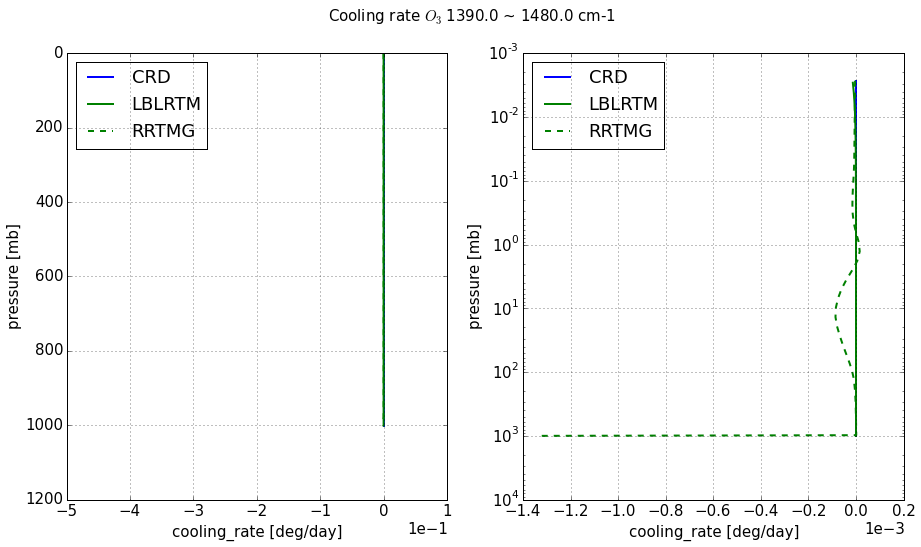

---------------------------------------------------------------------------


RRTMG Wavenumber band: 1480.0 ~ 1800.0 cm-1

CRD
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -17.8828          0  -17.8828            -0
30   299.70000 -17.8828          0  -17.8828            -0
0   1013.00000 -17.8828          0  -17.8828            -0

LBLRTM
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -17.902258  0.000000e+00 -17.902258  0.000000e+00
30   299.800000 -17.902258  2.291789e-08 -17.902258 -8.945306e-10
0   1013.000000 -17.902258  8.544518e-08 -17.902258  1.237200e-09

RRTMG
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -17.838741   0.000000 -17.838741      0.000000
30   299.8000 -17.871812   0.003319 -17.868492     -0.000087
0   1013.0000 -17.882889   0.005211 -17.877677     -0.003128

CRD - LBLRTM
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.019458  0.000000e+00  0

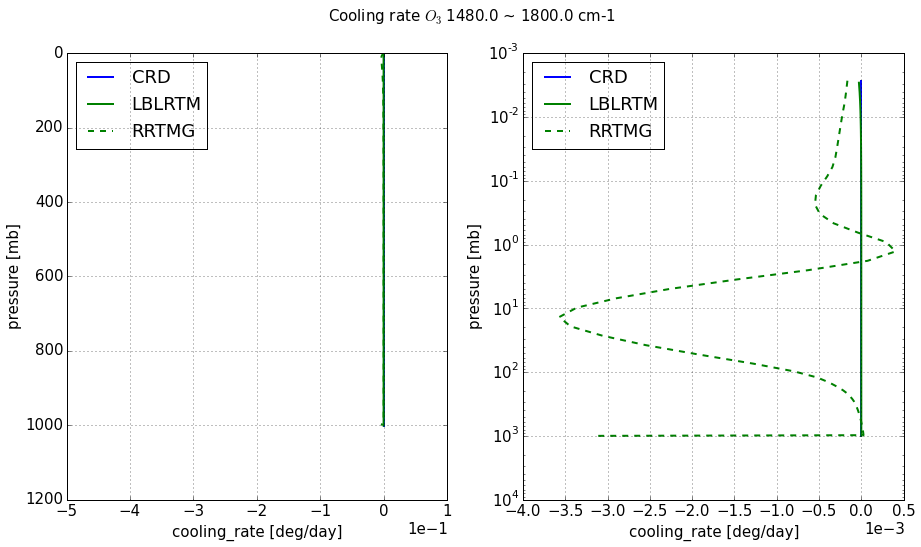

---------------------------------------------------------------------------


RRTMG Wavenumber band: 1800.0 ~ 2080.0 cm-1

CRD
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -5.9578          0   -5.9578            -0
30   299.70000  -5.9578          0   -5.9578            -0
0   1013.00000  -5.9578          0   -5.9578            -0

LBLRTM
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -5.965987  0.000000e+00 -5.965987  0.000000e+00
30   299.800000 -5.965987  5.834966e-09 -5.965987 -3.356538e-10
0   1013.000000 -5.965987  2.509201e-08 -5.965987  4.105883e-10

RRTMG
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -5.865690   0.000000 -5.865690      0.000000
30   299.8000 -5.893006   0.001965 -5.891040     -0.000087
0   1013.0000 -5.957771   0.003947 -5.953824     -0.022073

CRD - LBLRTM
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.008187  0.000000e+00  0.008187 -0.00000

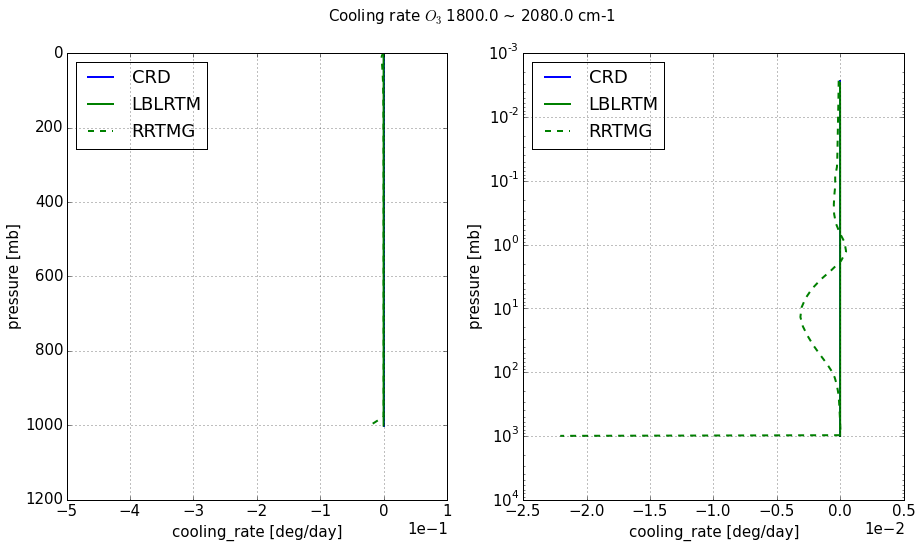

---------------------------------------------------------------------------


RRTMG Wavenumber band: 2080.0 ~ 2250.0 cm-1

CRD
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -1.5417     0.0000   -1.5417            -0
30   299.70000  -1.6390     0.0075   -1.6315            -0
0   1013.00000  -1.6390     0.0076   -1.6314            -0

LBLRTM
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -1.641655  0.000000e+00 -1.641655  0.000000e+00
30   299.800000 -1.641655  1.318907e-09 -1.641655 -9.823153e-11
0   1013.000000 -1.641655  6.319246e-09 -1.641655  1.126136e-10

RRTMG
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -1.517403   0.000000 -1.517403      0.000000
30   299.8000 -1.625354   0.005199 -1.620155     -0.000516
0   1013.0000 -1.639014   0.013533 -1.625481     -0.000225

CRD - LBLRTM
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.099955     0.0000  0.099955 -0.000000e+00


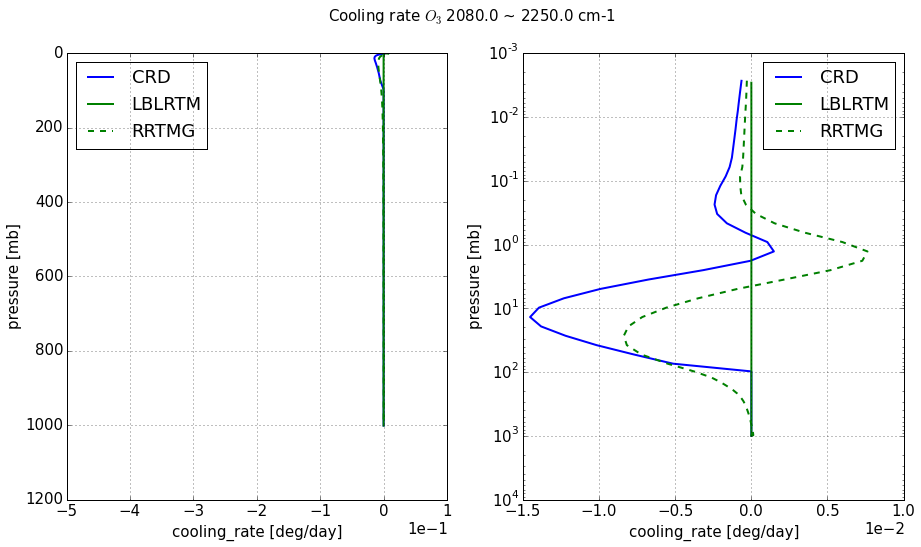

---------------------------------------------------------------------------


RRTMG Wavenumber band: 2250.0 ~ 2380.0 cm-1

CRD
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.7315          0   -0.7315            -0
30   299.70000  -0.7315          0   -0.7315            -0
0   1013.00000  -0.7316          0   -0.7316            -0

LBLRTM
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -0.732844  0.000000e+00 -0.732844  0.000000e+00
30   299.800000 -0.732844  5.224365e-10 -0.732844 -4.517531e-11
0   1013.000000 -0.732844  2.676597e-09 -0.732844  5.016600e-11

RRTMG
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.730956   0.000000 -0.730956  0.000000e+00
30   299.8000 -0.731077   0.000007 -0.731070 -3.775092e-07
0   1013.0000 -0.731556   0.000016 -0.731539 -1.655832e-04

CRD - LBLRTM
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.001344  0.000000e+00  0.001344 -0.00000

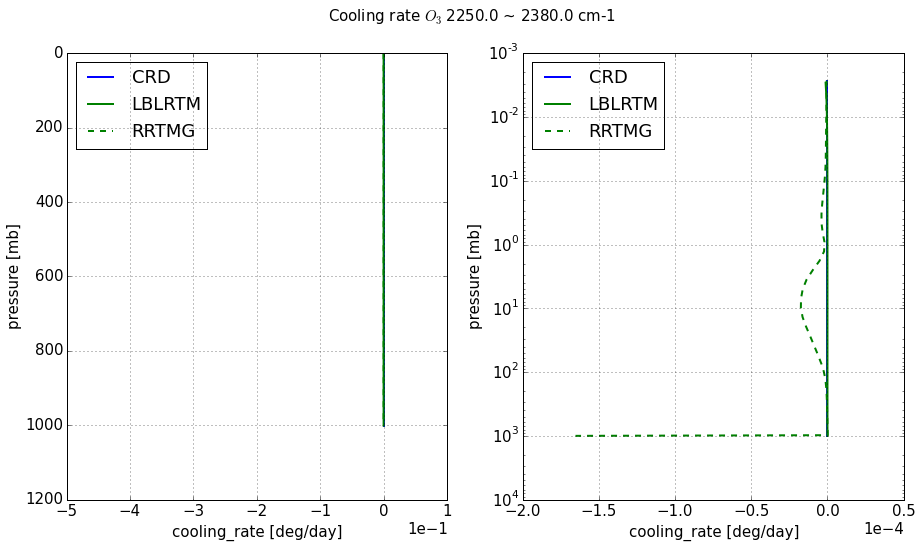

---------------------------------------------------------------------------


RRTMG Wavenumber band: 2380.0 ~ 2600.0 cm-1

CRD
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.5485     0.0000   -0.5485      -0.00000
30   299.70000  -0.5700     0.0007   -0.5693      -0.00110
0   1013.00000  -0.6658     0.1148   -0.5510       0.00315

LBLRTM
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -0.667119  0.000000e+00 -0.667119  0.000000e+00
30   299.800000 -0.667119  4.207911e-10 -0.667119 -4.218625e-11
0   1013.000000 -0.667119  2.310911e-09 -0.667119  4.556381e-11

RRTMG
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.665366   0.000000 -0.665366  0.000000e+00
30   299.8000 -0.665406   0.000002 -0.665404 -1.121754e-07
0   1013.0000 -0.665840   0.000003 -0.665836 -1.530274e-04

CRD - LBLRTM
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.118619     0.0000  0.118619      -0.00000


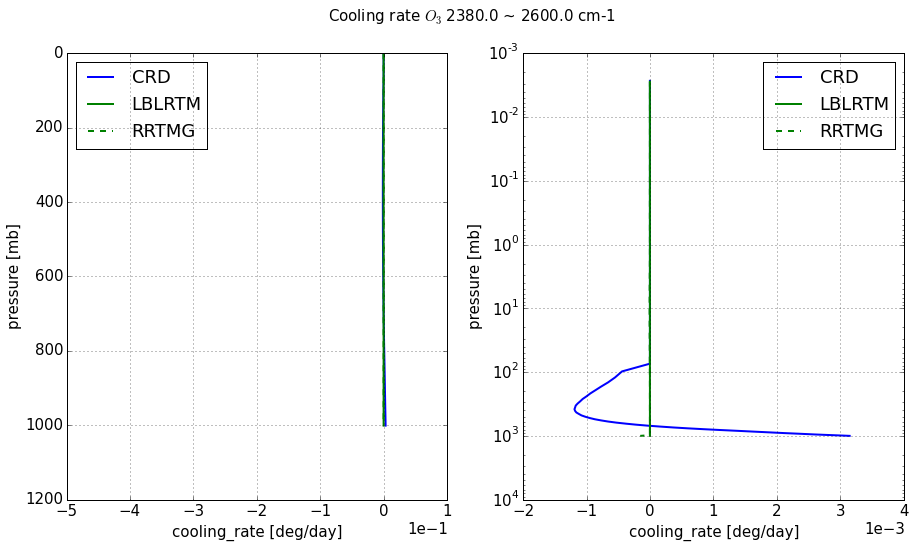

---------------------------------------------------------------------------


RRTMG Wavenumber band: 2600.0 ~ 3250.0 cm-1

CRD
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.4713          0   -0.4713            -0
30   299.70000  -0.4713          0   -0.4713            -0
0   1013.00000  -0.4713          0   -0.4713            -0

LBLRTM
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -0.404431  0.000000e+00 -0.404431  0.000000e+00
30   299.800000 -0.404431  2.104346e-10 -0.404431 -2.639985e-11
0   1013.000000 -0.404431  1.291457e-09 -0.404431  2.751858e-11

RRTMG
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.401927   0.000000 -0.401927      0.000000
30   299.8000 -0.402391   0.000013 -0.402378     -0.000001
0   1013.0000 -0.403547   0.000032 -0.403515     -0.000397

CRD - LBLRTM
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003 -0.066869  0.000000e+00 -0.066869 -0.00000

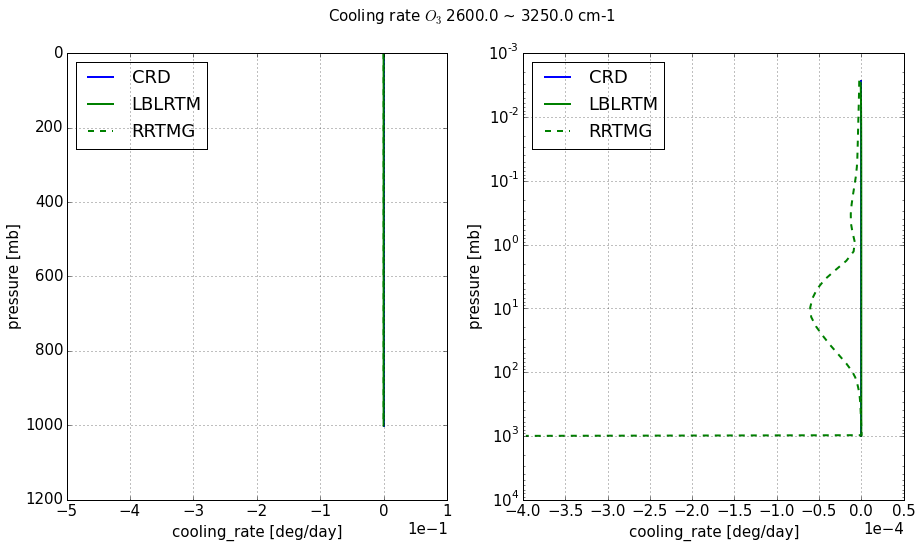

In [23]:
print('Flux tables and cooling rates in RRTMG spectral bands')
print()
print()

fluxtableNhrplot_by_rrtmg_bands(pnl_rrtmg, \
                                ('CRD', 'b', '-', pnl_crd), \
                               ('LBLRTM', 'g', '-', pnl_lblrtm))   

# In CLIRAD's wavenumber bands

In [24]:


def fluxtableNhrplot_by_clirad_bands(pnl_clirad, *infos_lbl):    
    global name_molecule, xlim_linear
    clirad_wbands = rtmtools.clirad.lw.info.wavenumber_bands()
    wbands = list(range(1, 10 + 1))
    wranges = {wband: clirad_wbands[wband] for wband in wbands}
    
    atm_levels = [70, 30, 0]
    
    names, colours, linestyles, pnls_lbl = map(list, zip(*infos_lbl))
            
    lbl_pnls_by_clirad_bands = [rtmtools.clirad.sw.analyse.lines2bands(pnl_lbl, wbands = wranges)\
                              for pnl_lbl in pnls_lbl]
    
    names.append('CLIRAD')
    colours.append('b')
    linestyles.append('--')
    pnls = [pnl_clirad] + lbl_pnls_by_clirad_bands
    
    
    for wband in wbands:
        print('---------------------------------------------------------------------------')
        print() 
        dfs = [pnl[wband].loc[atm_levels, :] for pnl in pnls]
        
        wlabel = ' '.join(['{} ~ {}'.format(*interval) for interval in wranges[wband]]) + ' cm-1'
        
        viz.tabulate_difference(dfs = dfs, 
                                names = names,
                                title = 'Wavenumber band: {}, {}'.format(wband, wlabel))
        
        dfs = [pnl[wband] for pnl in pnls]
        
        max_cr = max([df['cooling_rate'].max() for df in dfs])
        
        viz.plot_pres_vs_hrcr(dfs = dfs,
                              names = names,
                              linestyles = linestyles, 
                              colours = colours,
                              title = 'Cooling rate {} {}'.format(name_molecule, wlabel),
                              cooling_rate = True,
                             xlim_linear = xlim_linear,
                             xlim_log = (-.5, 20) if max_cr >= 20 else None)
    
        display.display(plt.gcf()); plt.close()    


Flux tables and cooling rates in CLIRAD spectral bands


---------------------------------------------------------------------------


Wavenumber band: 1, 0 ~ 340 cm-1

CRD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -51.09215   0.000004 -51.092146            -0
30   299.800000 -51.09215   0.000004 -51.092146            -0
0   1013.000000 -51.09215   0.000004 -51.092146            -0

LBLRTM
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -51.09304  0.000000e+00 -51.093040  0.000000e+00
30   299.800000 -51.09304  2.655836e-07 -51.093040  1.255140e-09
0   1013.000000 -51.09304  5.329452e-07 -51.093039  3.593164e-09

CLIRAD
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -51.148164   0.000000 -51.148164      0.000000
30   299.8000 -51.178177   0.079914 -51.098263      0.000198
0   1013.0000 -51.100657   0.094825 -51.005832      0.028385

CRD - LBLRTM
    pressure  flux_up  flux_down  net_flux  c

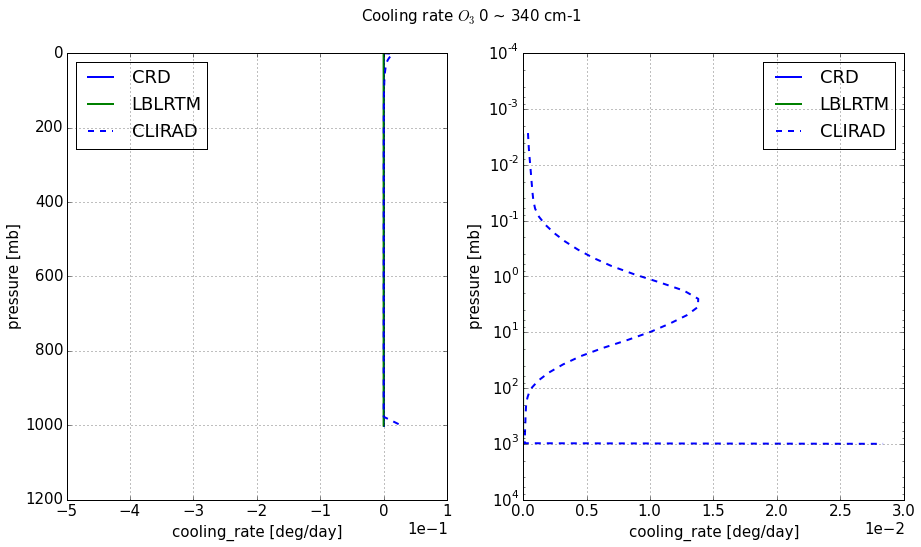

---------------------------------------------------------------------------


Wavenumber band: 2, 340 ~ 540 cm-1

CRD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -82.31578   0.000004 -82.315776            -0
30   299.800000 -82.31578   0.000008 -82.315772            -0
0   1013.000000 -82.31578   0.000008 -82.315772            -0

LBLRTM
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -82.315834  0.000000e+00 -82.315834  0.000000e+00
30   299.800000 -82.315835  3.514494e-07 -82.315834  6.818576e-10
0   1013.000000 -82.315835  7.585482e-07 -82.315834  5.776692e-09

CLIRAD
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -82.326400   0.000000 -82.326400  0.000000e+00
30   299.8000 -82.326854   0.000592 -82.326262  8.123909e-07
0   1013.0000 -82.315849   0.000755 -82.315094  3.920285e-03

CRD - LBLRTM
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.000054   0.000004  0.0

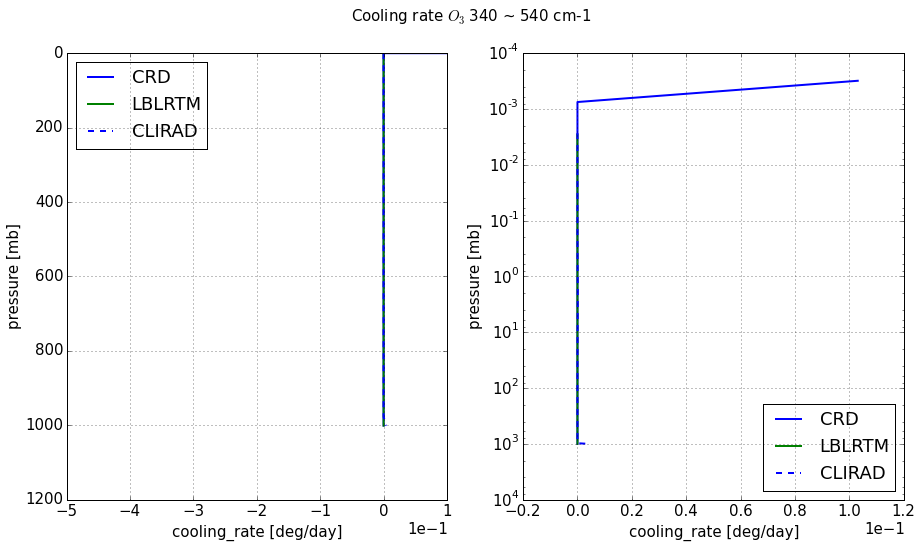

---------------------------------------------------------------------------


Wavenumber band: 3, 540 ~ 800 cm-1

CRD
       pressure  flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -112.816   0.000004 -112.815996            -0
30   299.800000 -112.816   0.000008 -112.815992            -0
0   1013.000000 -112.816   0.000008 -112.815992            -0

LBLRTM
       pressure     flux_up     flux_down    net_flux  cooling_rate
70     0.002417 -112.837813  0.000000e+00 -112.837813  0.000000e+00
30   299.800000 -112.837813  3.806693e-07 -112.837813 -9.236175e-10
0   1013.000000 -112.837813  9.021645e-07 -112.837812  7.897587e-09

CLIRAD
     pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.0024 -110.692149   0.000000 -110.692149      0.000000
30   299.8000 -112.656351   1.051774 -111.604577     -0.002363
0   1013.0000 -112.816764   1.319290 -111.497473     -0.010324

CRD - LBLRTM
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.021813

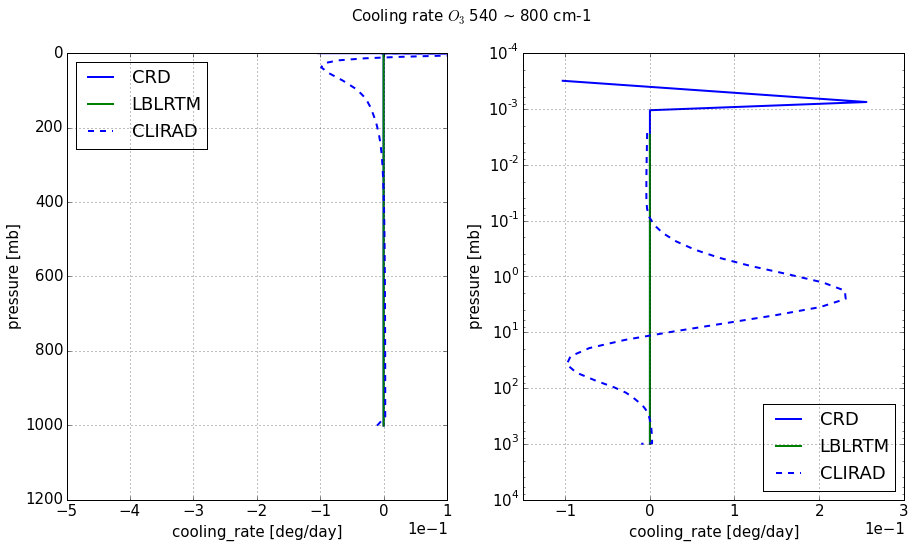

---------------------------------------------------------------------------


Wavenumber band: 4, 800 ~ 980 cm-1

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -61.64932          0 -61.64932            -0
30   299.800000 -61.64932          0 -61.64932            -0
0   1013.000000 -61.64932          0 -61.64932            -0

LBLRTM
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -61.681242  0.000000e+00 -61.681242  0.000000e+00
30   299.800000 -61.681243  1.637677e-07 -61.681243 -1.355153e-09
0   1013.000000 -61.681243  4.299970e-07 -61.681242  4.304974e-09

CLIRAD
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -61.589145   0.000000 -61.589145      0.000000
30   299.8000 -61.626912   0.016330 -61.610582     -0.000070
0   1013.0000 -61.657526   0.027165 -61.630361     -0.009081

CRD - LBLRTM
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  0.031922  0.000000e+00  0

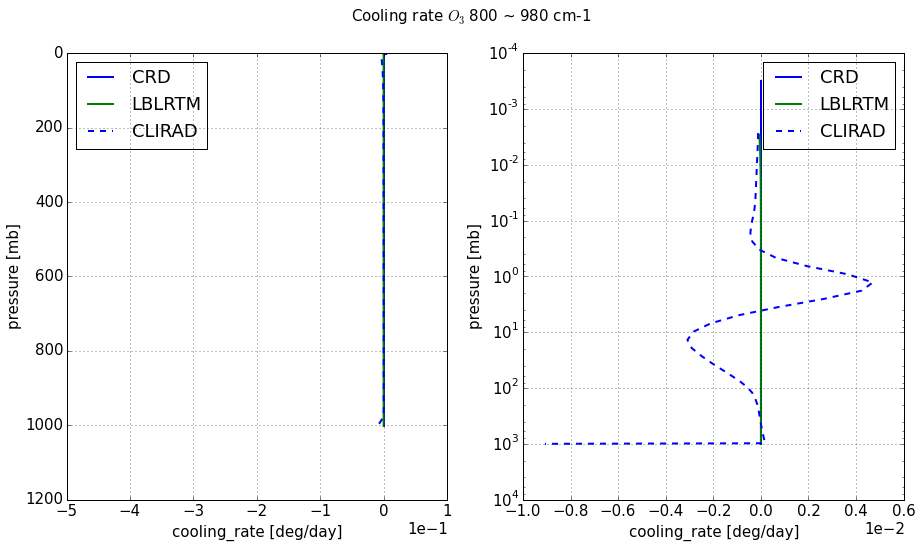

---------------------------------------------------------------------------


Wavenumber band: 5, 980 ~ 1100 cm-1

CRD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -22.01741  4.842877e-07 -22.017410     -0.139192
30   299.800000 -29.28325  2.313905e+00 -26.969345     -0.058855
0   1013.000000 -31.34392  4.914667e+00 -26.429253      0.029646

LBLRTM
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -23.076111   0.000000 -23.076111      0.000000
30   299.800000 -29.412917   2.063562 -27.349356     -0.059957
0   1013.000000 -31.354231   4.378188 -26.976043      0.026399

CLIRAD
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -22.883789   0.000000 -22.883789      0.000000
30   299.8000 -29.405425   2.076119 -27.329306     -0.061748
0   1013.0000 -31.337711   4.357831 -26.979879      0.021684

CRD - LBLRTM
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  1.058701  4.842877e-

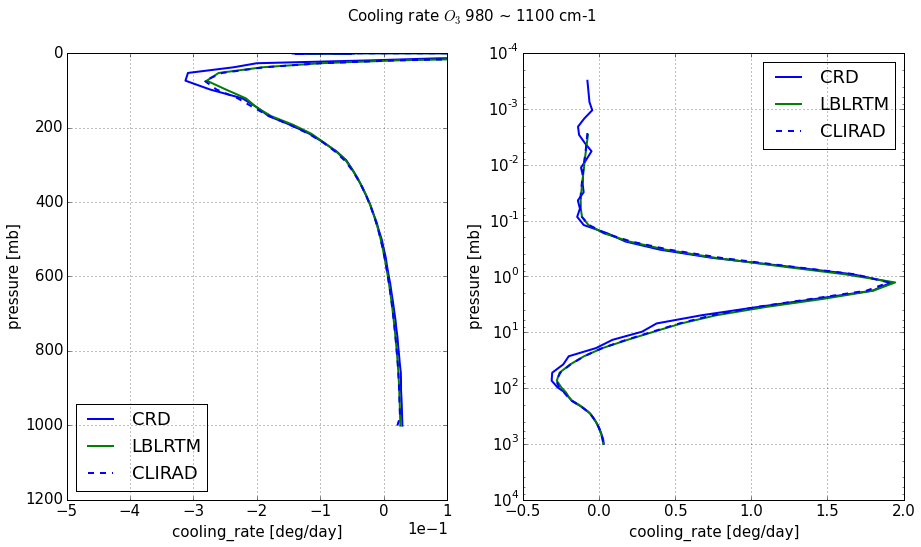

---------------------------------------------------------------------------


Wavenumber band: 6, 1100 ~ 1215 cm-1

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -23.27341          0 -23.27341            -0
30   299.800000 -23.27341          0 -23.27341            -0
0   1013.000000 -23.27341          0 -23.27341            -0

LBLRTM
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -23.269652  0.000000e+00 -23.269652  0.000000e+00
30   299.800000 -23.269652  4.643548e-08 -23.269652 -8.180951e-10
0   1013.000000 -23.269652  1.389566e-07 -23.269652  1.618239e-09

CLIRAD
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -22.796020   0.000000 -22.796020      0.000000
30   299.8000 -23.215059   0.100448 -23.114611     -0.001012
0   1013.0000 -23.254791   0.142869 -23.111922     -0.002761

CRD - LBLRTM
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0 -0.003758  0.000000e+00 

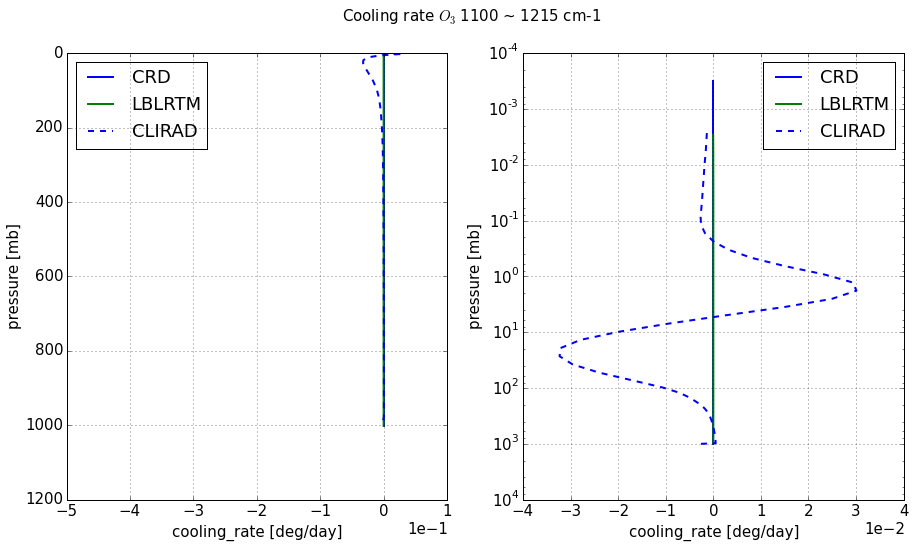

---------------------------------------------------------------------------


Wavenumber band: 7, 1215 ~ 1380 cm-1

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -23.74062          0 -23.74062            -0
30   299.800000 -23.74062          0 -23.74062            -0
0   1013.000000 -23.74062          0 -23.74062            -0

LBLRTM
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -23.755165  0.000000e+00 -23.755165  0.000000e+00
30   299.800000 -23.755165  4.129745e-08 -23.755165 -9.604811e-10
0   1013.000000 -23.755165  1.320426e-07 -23.755165  1.648939e-09

CLIRAD
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -23.726660   0.000000 -23.726660      0.000000
30   299.8000 -23.727695   0.000254 -23.727442     -0.000003
0   1013.0000 -23.736876   0.000438 -23.736439     -0.003216

CRD - LBLRTM
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  0.014545  0.000000e+00 

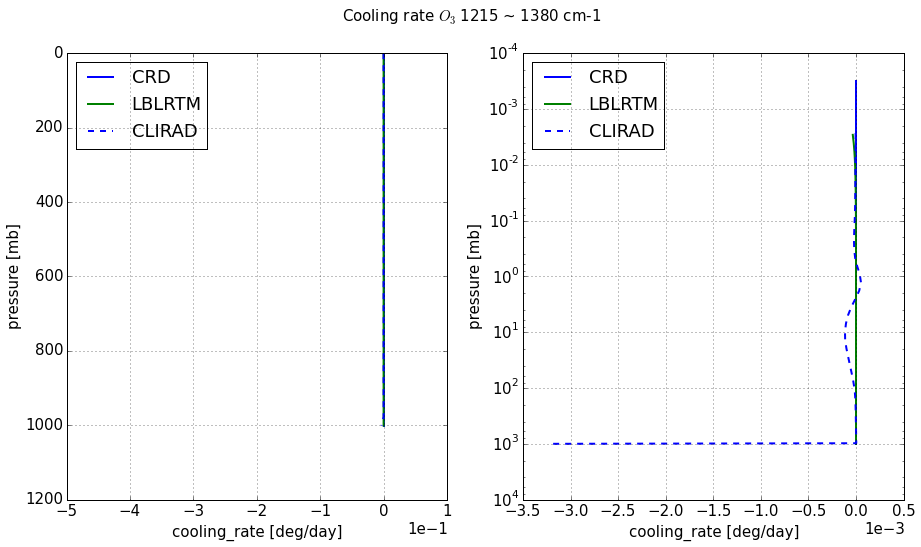

---------------------------------------------------------------------------


Wavenumber band: 8, 1380 ~ 1900 cm-1

CRD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -30.88047  2.421439e-07 -30.880470            -0
30   299.800000 -30.88047  1.966953e-06 -30.880468            -0
0   1013.000000 -30.88047  1.966953e-06 -30.880468            -0

LBLRTM
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -30.729595  0.000000e+00 -30.729595  0.000000e+00
30   299.800000 -30.729595  4.106866e-08 -30.729595 -1.499367e-09
0   1013.000000 -30.729595  1.496447e-07 -30.729595  2.124841e-09

CLIRAD
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -30.640443   0.000000 -30.640443      0.000000
30   299.8000 -30.680089   0.003981 -30.676109     -0.000104
0   1013.0000 -30.697533   0.006264 -30.691269     -0.005225

CRD - LBLRTM
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0 -0.15087

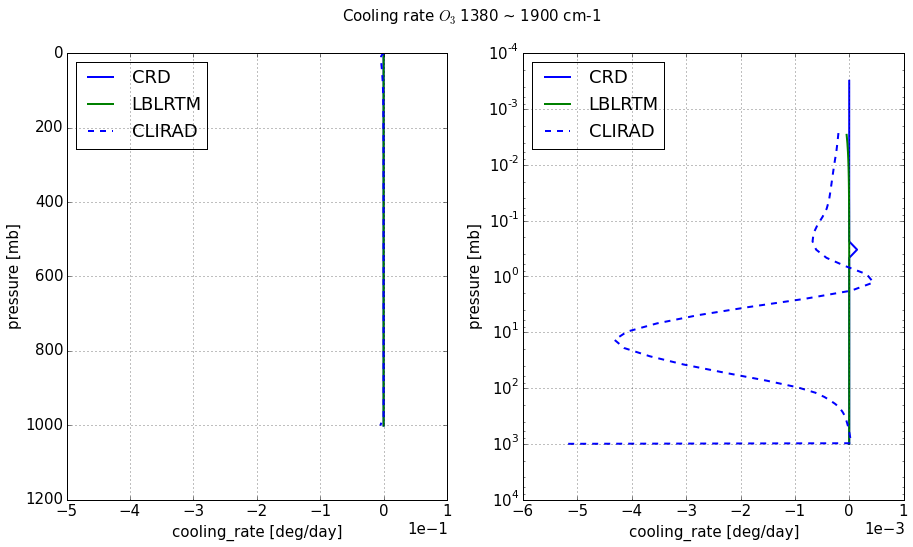

---------------------------------------------------------------------------


Wavenumber band: 9, 1900 ~ 3000 cm-1

CRD
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -6.674494 -1.536682e-08 -6.674494            -0
30   299.800000 -6.674494 -2.533197e-07 -6.674494            -0
0   1013.000000 -6.674494 -5.066395e-07 -6.674495            -0

LBLRTM
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -6.625445  0.000000e+00 -6.625445  0.000000e+00
30   299.800000 -6.625445  5.418739e-09 -6.625445 -3.942476e-10
0   1013.000000 -6.625445  2.564721e-08 -6.625445  4.544859e-10

CLIRAD
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -6.405988   0.000000 -6.405988      0.000000
30   299.8000 -6.536228   0.006685 -6.529543     -0.000591
0   1013.0000 -6.614782   0.016728 -6.598054     -0.022461

CRD - LBLRTM
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0 -0.049049 -1.536682e-08 -0.0

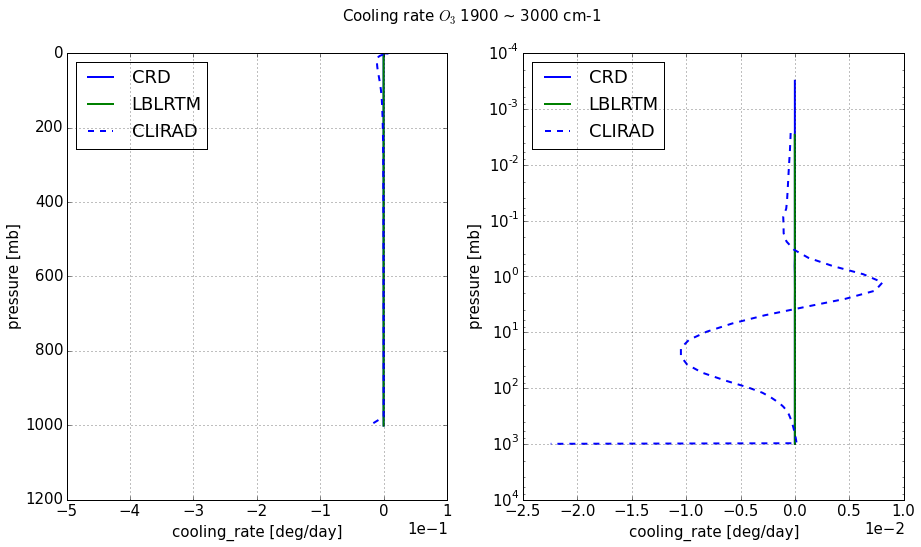

---------------------------------------------------------------------------


Wavenumber band: 10, 540 ~ 620 cm-1

CRD
       pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.002417       -0          0         0            -0
30   299.800000       -0          0         0            -0
0   1013.000000       -0          0         0            -0

LBLRTM
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -36.23542  0.000000e+00 -36.23542  0.000000e+00
30   299.800000 -36.23542  1.339173e-07 -36.23542 -7.753076e-11
0   1013.000000 -36.23542  3.059209e-07 -36.23542  2.538879e-09

CLIRAD
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -36.212558   0.000000 -36.212558      0.000000
30   299.8000 -36.223754   0.008035 -36.215719     -0.000004
0   1013.0000 -36.231410   0.010693 -36.220717     -0.002380

CRD - LBLRTM
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  36.23542  0.000000e+00  36.23542 -0.

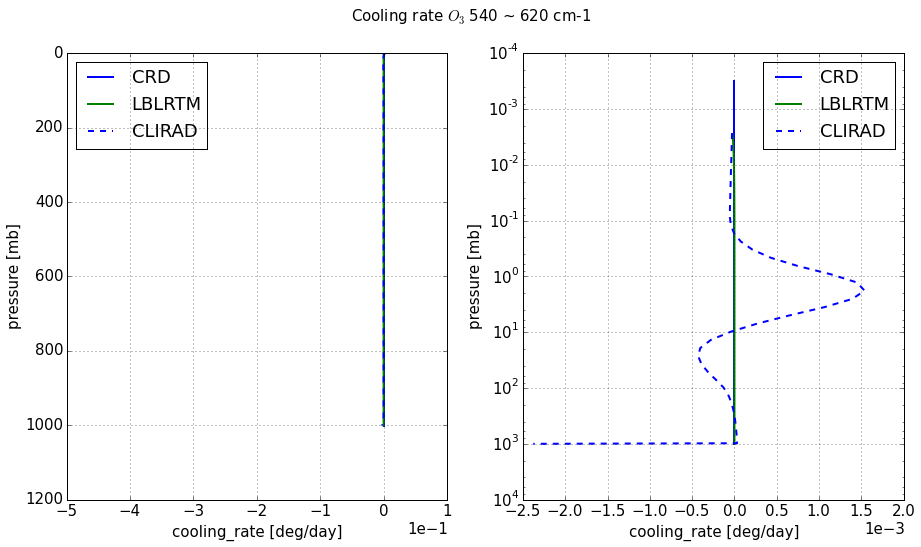

In [25]:
print('Flux tables and cooling rates in CLIRAD spectral bands')
print()
print()

fluxtableNhrplot_by_clirad_bands(pnl_clirad, \
                                ('CRD', 'b', '-', pnl_crd), \
                                ('LBLRTM', 'g', '-', pnl_lblrtm))

In [19]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')